In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('clf_data.csv')
df.head()

,x,y,Class
0,0.391158,0.331262,C1
1,0.337966,0.380486,C1
2,0.385709,0.272493,C1
3,0.298501,0.251246,C1
4,0.308310,0.219985,C1


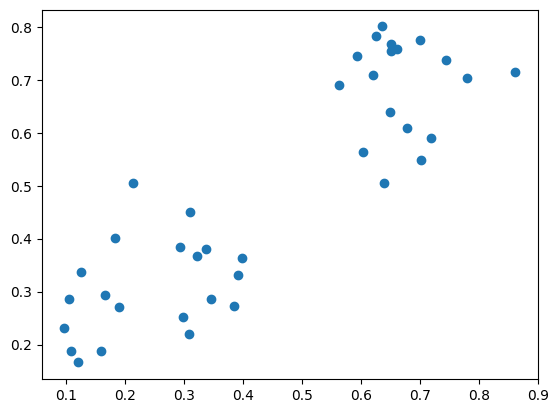

In [3]:
plt.scatter(df['x'], df['y'])

In [7]:
X = df[['x', 'y']].values
t = (df['Class'] == 'C2').astype(int)

In [15]:
def sigmoid(z):
    sigmoid = 1 / (1 + np.exp(-z))
    return sigmoid

def predict(X, w, b):
    z = np.dot(X, w) + b
    return sigmoid(z)

def cost(X, t, w, b):
    y = predict(X, w, b)
    N = len(t)

    cost = (1/N) * np.sum(-t * np.log(y) - (1-t) * np.log(1-y))
    return cost

def gradient_descent(X, t, num_epochs):
    w = np.zeros(X.shape[1])
    b = 0.0
    alpha = 0.01
    N = len(t)
    costs = []

    for epoch in range(num_epochs):
        y = predict(X, w, b)

        gradient_w = (1/N) * np.dot(X.T, (y-t))
        gradient_b = (1/N) * np.sum(y-t)

        w -= alpha * gradient_w
        b -= alpha * gradient_b

        cost_val = cost(X, t, w, b)
        costs.append(cost_val)

        if epoch % 100 == 0:
            print(f'Epoch {epoch}, Cost: {cost_val}')

    return w, b, costs



In [19]:
num_epochs = 2000
trained_w, trained_b, costs = gradient_descent(X, t, num_epochs)


predicted_probabilities = predict(X, trained_w, trained_b)
predictions = (predicted_probabilities >= 0.5).astype(int)

Epoch 0, Cost: 0.6929830750808788
Epoch 100, Cost: 0.6775323609269382
Epoch 200, Cost: 0.6634276920436141
Epoch 300, Cost: 0.6501724969554283
Epoch 400, Cost: 0.6375224410830554
Epoch 500, Cost: 0.6253541845027998
Epoch 600, Cost: 0.6136023900132744
Epoch 700, Cost: 0.6022295954825556
Epoch 800, Cost: 0.5912118182809436
Epoch 900, Cost: 0.5805316774326711
Epoch 1000, Cost: 0.5701751075353008
Epoch 1100, Cost: 0.5601297891261541
Epoch 1200, Cost: 0.550384399344651
Epoch 1300, Cost: 0.5409282543857159
Epoch 1400, Cost: 0.5317511387500053
Epoch 1500, Cost: 0.5228432232108279
Epoch 1600, Cost: 0.5141950245957413
Epoch 1700, Cost: 0.5057973849916814
Epoch 1800, Cost: 0.4976414597240875
Epoch 1900, Cost: 0.4897187090835573


In [20]:
print('Trained Weights (w):', trained_w)
print('Trained Bias (b):', trained_b)
print('Predictions:', predictions)

Trained Weights (w): [1.35296447 1.10433551]
Trained Bias (b): -1.0443896842488214
Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1]


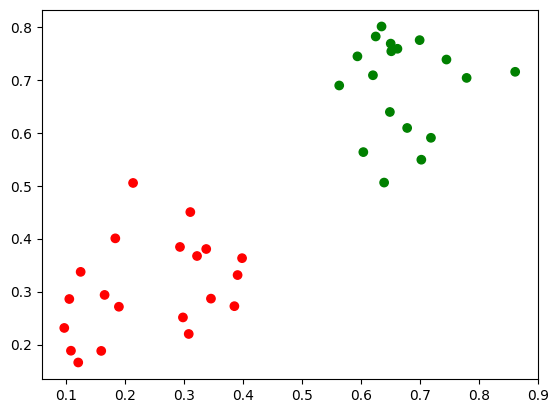

In [21]:
colors = ['red', 'green']
plt.scatter(x=df['x'], y=df['y'], c=predictions, cmap=matplotlib.colors.ListedColormap(colors))
